In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
from tensorflow.keras import optimizers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Flatten, Dropout, BatchNormalization, Conv2D, MaxPooling2D
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import ResNet50V2
from keras.applications import resnet
from tensorflow.keras.metrics import BinaryAccuracy, Precision, Recall, AUC

In [47]:
s=90
METRICS = [
      BinaryAccuracy(name='acc'),
      Precision(name='precision'),
      Recall(name='recall'),  
      AUC(name='auc')
]

In [48]:
main_dir="./Data"
train_data=ImageDataGenerator(rescale=1./255)
test_data=ImageDataGenerator(rescale=1./255)
valid_data=ImageDataGenerator(rescale=1./255)

train_dir=os.path.join(main_dir ,'train')
train_set = train_data.flow_from_directory(train_dir,target_size=(s,s),batch_size=8,class_mode='categorical')

test_dir=os.path.join(main_dir ,'test')
test_set = test_data.flow_from_directory(test_dir,target_size=(s,s),batch_size=8,class_mode='categorical')

valid_dir=os.path.join(main_dir ,'valid')
valid_set = test_data.flow_from_directory(valid_dir,target_size=(s,s),batch_size=8,class_mode='categorical')

Found 613 images belonging to 4 classes.
Found 315 images belonging to 4 classes.
Found 72 images belonging to 4 classes.


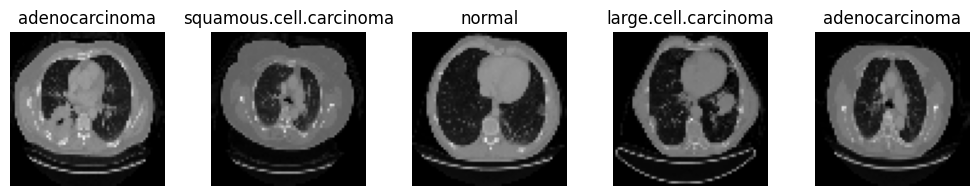

In [49]:
class_names=list(test_set.class_indices.keys())
plt.figure(figsize=(10, 10))
for _ in range(5):
    img, label = next(test_set)
    plt.subplot(1, 5, _+1)
    plt.tight_layout()        
    plt.axis('off')
    plt.imshow(img[0], cmap='gray') 
    plt.title(class_names[np.argmax(label[_])])

In [50]:
model_cnn = models.Sequential()
model_cnn.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(s,s,3)))
model_cnn.add(layers.MaxPooling2D((2, 2)))
model_cnn.add(layers.Conv2D(32, (3, 3), activation='relu'))
model_cnn.add(layers.MaxPooling2D((2, 2)))
model_cnn.add(layers.Conv2D(32, (3, 3), activation='relu'))
model_cnn.add(layers.Dropout((0.4)))
model_cnn.add(layers.Flatten())
model_cnn.add(layers.Dense(128, activation='relu', name='Layer_1'))
model_cnn.add(layers.Dropout((0.4)))
model_cnn.add(layers.Dense(64, activation='relu', name='Layer_2'))
model_cnn.add(layers.Dense(4, activation='softmax'))
model_cnn.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 62, 62, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_29 (MaxPooling2D) │ (None, 31, 31, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 29, 29, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_30 (MaxPooling2D) │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 12, 12, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Layer_1 (Dense)                 │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Layer_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 627,972 (2.40 MB)

 Trainable params: 627,972 (2.40 MB)

 Non-trainable params: 0 (0.00 B)

In [51]:
model_cnn.compile(loss='categorical_crossentropy',
              optimizer="rmsprop",
              metrics=METRICS)
cnn = model_cnn.fit(
         train_set,
         validation_data=valid_set,
         batch_size=32,
         epochs=16)

Epoch 1/16
77/77 ━━━━━━━━━━━━━━━━━━━━ 13s 87ms/step - acc: 0.7588 - auc: 0.6165 - loss: 1.3434 - precision: 0.6277 - recall: 0.0821 - val_acc: 0.7812 - val_auc: 0.7332 - val_loss: 1.1674 - val_precision: 0.8000 - val_recall: 0.1667
Epoch 2/16
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - acc: 0.7998 - auc: 0.7963 - loss: 1.0608 - precision: 0.7774 - recall: 0.2872 - val_acc: 0.8194 - val_auc: 0.8849 - val_loss: 0.9053 - val_precision: 1.0000 - val_recall: 0.2778
Epoch 3/16
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - acc: 0.8220 - auc: 0.8758 - loss: 0.8727 - precision: 0.7436 - recall: 0.4415 - val_acc: 0.8438 - val_auc: 0.8808 - val_loss: 0.8098 - val_precision: 0.7755 - val_recall: 0.5278
Epoch 4/16
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - acc: 0.8667 - auc: 0.9281 - loss: 0.6380 - precision: 0.7836 - recall: 0.6449 - val_acc: 0.8611 - val_auc: 0.9056 - val_loss: 0.7751 - val_precision: 0.7353 - val_recall: 0.6944
Epoch 5/16
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - acc: 0.8961 - auc: 0.9

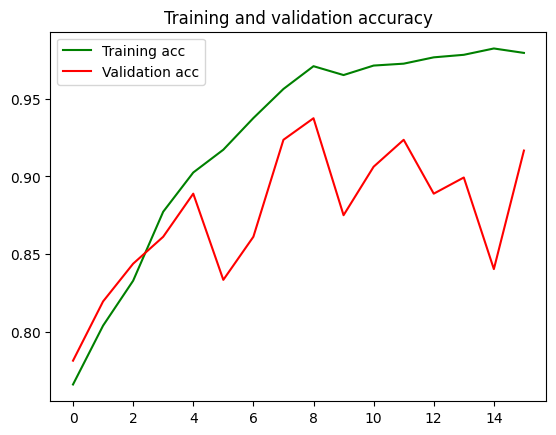

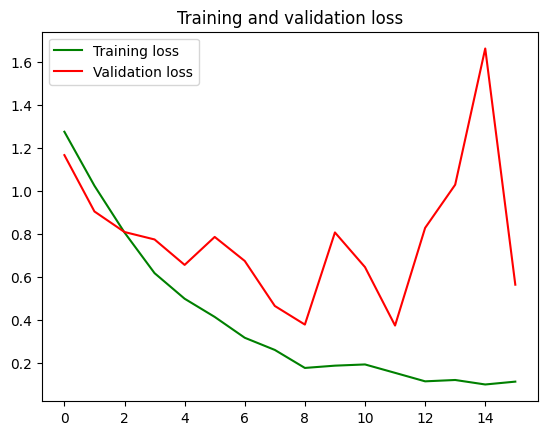

In [56]:
acc = cnn.history['acc']
val_acc = cnn.history['val_acc']
loss = cnn.history['loss']
val_loss = cnn.history['val_loss']

iters = range(len(acc))

plt.plot(iters, acc, 'g', label='Training acc')
plt.plot(iters, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(iters, loss, 'g', label='Training loss')
plt.plot(iters, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [66]:
pred = model_cnn.evaluate(test_set)
accuracy_cnn=pred[1]

40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - acc: 0.7849 - auc: 0.7936 - loss: 2.0643 - precision: 0.5718 - recall: 0.5568
